<a href="https://colab.research.google.com/github/yasuhiroinoue/AppMathSci/blob/main/%E5%BF%9C%E7%94%A8%E6%95%B0%E7%90%86(Adv.01).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit
!pip install qiskit_ibm_runtime
!pip install pylatexenc

In [1]:
from google.colab import userdata
ibm_token = userdata.get('ibm_token')

In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler

# Authenticate to IBM Quantum account
service = QiskitRuntimeService()
QiskitRuntimeService.save_account(
    ibm_token,
    channel='ibm_quantum', overwrite=True  # Specify the channel here
)

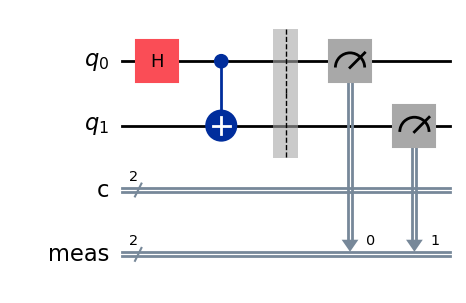

In [6]:
# Create a 2-qubit circuit
circuit = QuantumCircuit(2, 2)
circuit.h(0)  # Apply Hadamard gate
circuit.cx(0, 1)  # Apply CNOT gate
circuit.measure_all()
circuit.draw('mpl')

In [7]:
# Select the least busy available backend
backend = service.least_busy(operational=True, simulator=False)
print(f"Selected backend: {backend}")

# Transpile the circuit with optimization level 1
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(circuit)

# Execute using the Sampler primitive
sampler = Sampler(mode=backend)
sampler.options.default_shots = 1024  # Options can be set using auto-complete.
job = sampler.run([isa_circuit])
print(f"Job ID is {job.job_id()}")

Selected backend: <IBMBackend('ibm_sherbrooke')>
Job ID is cw0kdxqjz3x0008j6cw0


In [8]:
pub_result = job.result()[0]
print(f"Counts for the meas output register: {pub_result.data.meas.get_counts()}")

Counts for the meas output register: {'00': 464, '10': 34, '11': 493, '01': 33}


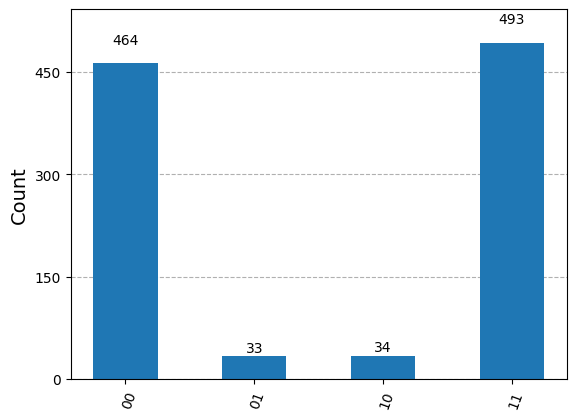

In [9]:
from qiskit.visualization import plot_histogram

# Display the histogram
plot_histogram(pub_result.data.meas.get_counts())